student number:C1986330

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
shoppers = pd.read_csv('/content/Coursework_1_data(1).csv')

**Data exploration**

In [ ]:
# Information of the shoppers dataset.
pd.set_option('display.max_columns', None, 'max_colwidth', None, 'display.expand_frame_repr', False) 
shoppers .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
# Column names of the dataset.
shoppers.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
#the first few lines of the dataset. 
shoppers.head(5)

In [ ]:
# Below is the statistics of the dataset.
shoppers.describe()

In [ ]:
shoppers['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

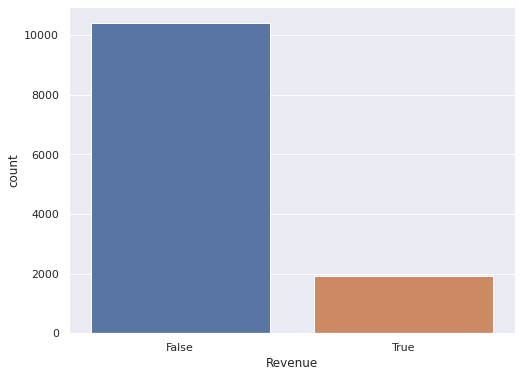

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Revenue", data=shoppers ,saturation=0.75)

In [ ]:
plt.figure(figsize=(8,6))
montns= sns.countplot(x="Month", data=shoppers, palette="Set3")

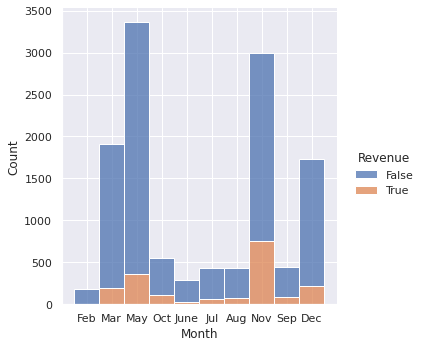

In [ ]:
sns.displot(shoppers, x="Month", hue="Revenue", multiple="stack")

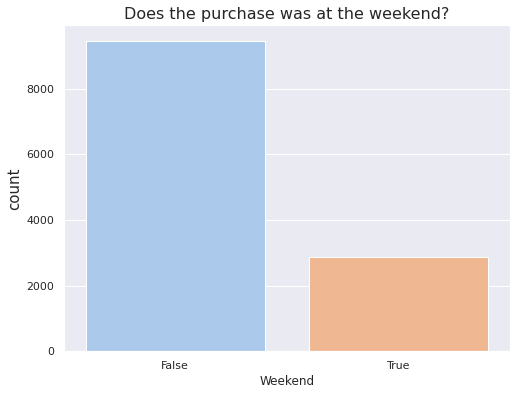

In [ ]:
plt.figure(figsize=(8,6))
weekends = sns.countplot(x = 'Weekend', data = shoppers, palette = 'pastel')
plt.title('Does the purchase was at the weekend?', fontsize = 16)
plt.ylabel('count', fontsize = 15)

plt.show()

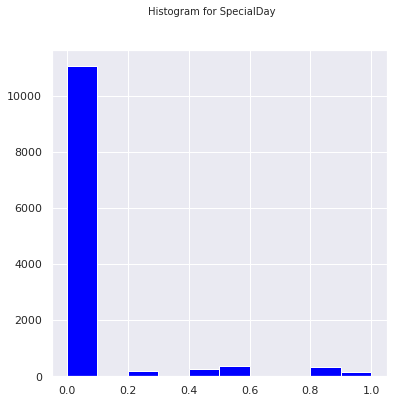

In [ ]:
shoppers['SpecialDay'].hist(figsize=(6,6), color='blue')
plt.suptitle("Histogram for SpecialDay ", fontsize=10)
plt.show()

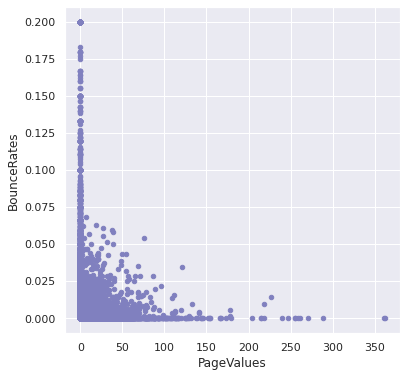

In [ ]:
shoppers.plot(kind='scatter',x='PageValues' ,y='BounceRates',c=np.array([0.5, 0.5, 0.75]).reshape(1,-1),figsize=(6,6))

In [ ]:
#check the correlation withe the tatget 'Revenue'.
corr_matrix = shoppers.corr()
corr_matrix["Revenue"].sort_values(ascending=False)

Revenue                    1.000000
PageValues                 0.492569
ProductRelated             0.158538
ProductRelated_Duration    0.152373
Administrative             0.138917
Informational              0.095200
Administrative_Duration    0.093587
Informational_Duration     0.070345
Weekend                    0.029295
Browser                    0.023984
TrafficType               -0.005113
Region                    -0.011595
OperatingSystems          -0.014668
SpecialDay                -0.082305
BounceRates               -0.150673
ExitRates                 -0.207071
Name: Revenue, dtype: float64

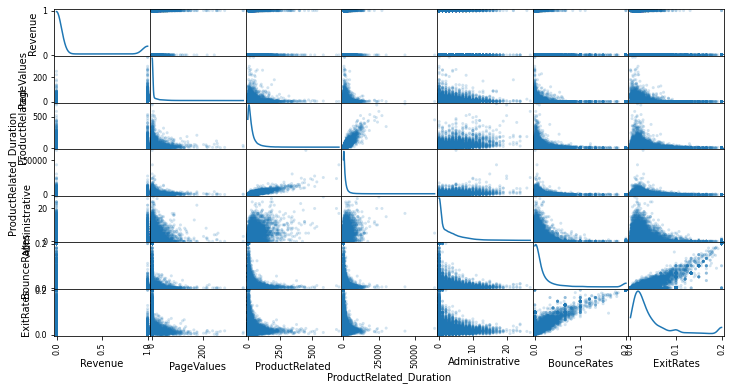

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
attributes = ["Revenue", "PageValues", "ProductRelated",
"ProductRelated_Duration",'Administrative','BounceRates','ExitRates']
scatter_matrix(shoppers[attributes],alpha=0.2, figsize=(12,6),diagonal="kde")
plt.show()

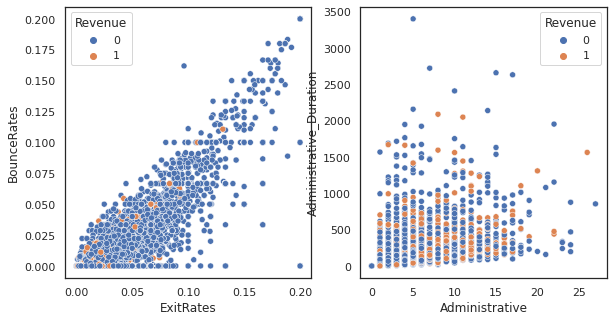

In [ ]:
#plot the most ccorrelated ones
. 
import seaborn as sns
plt.figure(figsize = (15, 5))
sns.set_style('white')
plt.subplot(131)
sns.scatterplot(x="ExitRates" ,y='BounceRates',hue="Revenue", data=shoppers)
plt.subplot(132)
sns.scatterplot(x="Administrative", y="Administrative_Duration",hue="Revenue", data=shoppers)
plt.show()

**Data pre-processing**

In [ ]:
#check if there are missing values.
shoppers.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
shoppers['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [ ]:
#convert the boolean features to int 
shoppers['Weekend'] = shoppers['Weekend'].astype(int)
shoppers['Revenue'] = shoppers['Revenue'].astype(int)

In [ ]:
#we noticed here that the value in Momth and VisitorType columns were repetitve so we will check their type.
categorical_feature_mask = shoppers.dtypes==object
categorical_cols = shoppers.columns[categorical_feature_mask].tolist()
categorical_cols

['Month', 'VisitorType']

In [ ]:
print(shoppers['VisitorType'].value_counts().count())
shoppers['VisitorType'].value_counts()

3


Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [ ]:
print(shoppers['Month'].value_counts().count())
shoppers['Month'].value_counts()

10


May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

Splitting the data into training and testing

In [ ]:
#Split the data for training and testing 
X=shoppers.drop('Revenue',axis=1)
y=shoppers['Revenue']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(9864, 17) (2466, 17) (9864,) (2466,)


detect outliers to decide which scales better to use ..

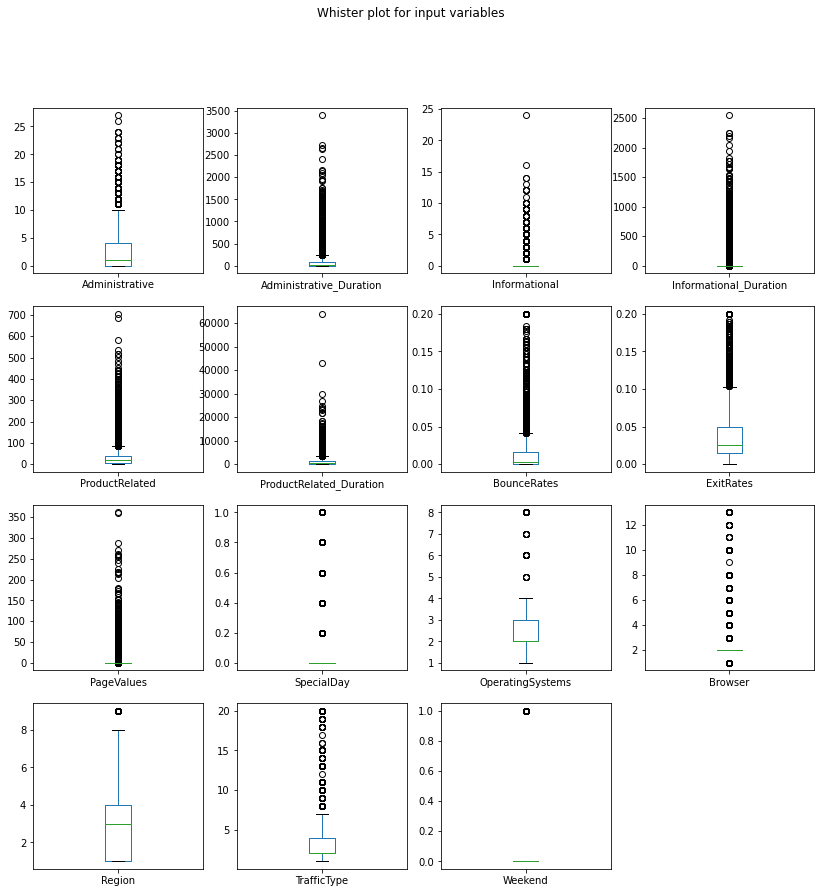

In [ ]:
# Whiskerplots to show if there are outliers ..
c = 'blue'
shoppers.drop('Revenue', axis=1).plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(14,14), 
                                        title='Whister plot for input variables')
plt.savefig('shopping_box')
plt.show()

In [ ]:
#to detect the outliers we create a datafram contenes just the numerice columns . 
Outliers  = shoppers[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration'
,'BounceRates','ExitRates','PageValues']]
# calculate interquartile range.
Q1 = Outliers.quantile(0.25)
Q3 = Outliers.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
#Detect outliers using IQR.
((Outliers < (Q1 - 1.5 * IQR)) | (Outliers > (Q3 + 1.5 * IQR))).sum()

Administrative              404
Administrative_Duration    1172
Informational              2631
Informational_Duration     2405
ProductRelated              987
ProductRelated_Duration     961
BounceRates                1551
ExitRates                  1099
PageValues                 2730
dtype: int64

In the following piece of code, we used(make_column_transformer )from sklearn to do multiple pre-processing at the same time.

In [ ]:
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.compose import make_column_transformer

ohe = OneHotEncoder()
ordn =  OrdinalEncoder()
scaler = RobustScaler()
ct = make_column_transformer(
    (ohe, ['VisitorType']),  # apply OneHotEncoder to visiterType and ordinalencoder on Month
    (ordn, ['Month']), 
    (scaler,['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration'
,'BounceRates','ExitRates','PageValues']),            #scaling the numrice features using RobustScaler .
    remainder='passthrough')     # include remaining columns in the output

# fit just on training data # perform preprossing transform of the dataset
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','Score']  #naming the dataframe columns

featureScores

,features,Score
0,Administrative,1133.965531
1,Administrative_Duration,41754.836841
2,Informational,357.981605
3,Informational_Duration,35059.775770
4,ProductRelated,19317.285376
5,ProductRelated_Duration,877404.339415
6,BounceRates,29.654336
7,ExitRates,28.985072
8,PageValues,175126.808512
9,SpecialDay,53.797094


In [ ]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                   features          Score
5   ProductRelated_Duration  877404.339415
8                PageValues  175126.808512
1   Administrative_Duration   41754.836841
3    Informational_Duration   35059.775770
4            ProductRelated   19317.285376
0            Administrative    1133.965531
2             Informational     357.981605
10                    Month      86.163696
9                SpecialDay      53.797094
15              VisitorType      37.547523


balanced the taining data using SMOTE.

In [ ]:
#balanced the taining data using SMOTE.
from imblearn.over_sampling import SMOTE 
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 1497
Before OverSampling, counts of label '0': 8367 

After OverSampling, the shape of train_X: (16734, 19)
After OverSampling, the shape of train_y: (16734,) 

After OverSampling, counts of label '1': 8367
After OverSampling, counts of label '0': 8367


**XGBClassifier**

In [ ]:
from xgboost import XGBClassifier
xgb_clf= XGBClassifier()
xgb_clf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
print('Accuracy score on train_data: ', accuracy_score(y_true = y_train, y_pred = xgb_clf.predict(X_train).round()))
print('Accuracy score on test_data: ', accuracy_score(y_true = y_test, y_pred = xgb_clf.predict(X_test).round()))

Accuracy score on train_data:  0.9176804541768045
Accuracy score on test_data:  0.8929440389294404


In [ ]:
import sklearn.metrics as metrics   
                                     
y_pred = xgb_clf.predict(X_test)
print(metrics. accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report,confusion_matrix # print classification report and confusion_matrix
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

0.8929440389294404
[[1973   82]
 [ 182  229]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2055
           1       0.74      0.56      0.63       411

    accuracy                           0.89      2466
   macro avg       0.83      0.76      0.79      2466
weighted avg       0.89      0.89      0.89      2466



here we tried Class Weighted XGBoost with grid search to get best scale_pos_weight(when we run this should be without using SMOTE)

In [ ]:
# grid search positive class weights with xgboost for imbalance classification 
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
# define model
model = XGBClassifier()
# define grid
weights = [1, 10, 25, 50, 75, 99, 100, 1000]
param_grid = dict(scale_pos_weight=weights)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X_train, y_train)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.933099 using {'scale_pos_weight': 10}
0.932948 (0.009706) with: {'scale_pos_weight': 1}
0.933099 (0.009647) with: {'scale_pos_weight': 10}
0.932174 (0.009719) with: {'scale_pos_weight': 25}
0.931199 (0.010045) with: {'scale_pos_weight': 50}
0.930577 (0.010044) with: {'scale_pos_weight': 75}
0.930242 (0.010232) with: {'scale_pos_weight': 99}
0.930176 (0.010204) with: {'scale_pos_weight': 100}
0.928911 (0.011355) with: {'scale_pos_weight': 1000}


In [ ]:
import sklearn.metrics as metrics 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix 
# define model
model = XGBClassifier(scale_pos_weight=10)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance    
model.fit(X_train, y_train)                                   
y_pred = model.predict(X_test)
print(metrics. accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))


0.8236009732360098
[[1670  385]
 [  50  361]]
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      2055
           1       0.48      0.88      0.62       411

    accuracy                           0.82      2466
   macro avg       0.73      0.85      0.75      2466
weighted avg       0.89      0.82      0.84      2466



**LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])
pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.
from sklearn.metrics import accuracy_score

y_pred = pipe.predict(X_test)
accuracy_score(y_test, y_pred)

0.8690186536901865

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import binarize 
# print the first 10 predicted responses
pipe.predict(X_test)[0:10]
# print the first 10 predicted probabilities of class membership
pipe.predict_proba(X_test)[0:10, :]
# print the first 10 predicted probabilities for class 1
pipe.predict_proba(X_test)[0:10, 1]
# store the predicted probabilities for class 1
y_pred_prob = pipe.predict_proba(X_test)[:, 1]

We can see that most of the true class are far away from the default threshold(0.5), will decrease the threshold for predicting true in order to increase the sensitivity of the classifier.

Text(0, 0.5, 'Frequency')

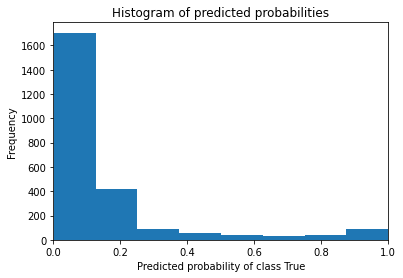

In [ ]:
import matplotlib.pyplot as plt
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of class True')
plt.ylabel('Frequency')

Adjusting the classification threshold

In [ ]:
# predict true if the predicted probability is greater than 0.189
y_pred = binarize([y_pred_prob], 0.189)[0]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1876  179]
 [ 133  278]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2055
           1       0.61      0.68      0.64       411

    accuracy                           0.87      2466
   macro avg       0.77      0.79      0.78      2466
weighted avg       0.88      0.87      0.88      2466



**KNeighborsClassifier**

In [ ]:
#Applying k-NN on any classification dataset
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 27, metric = 'minkowski')  

knn_clf.fit(X_train, y_train)
#k-NN performance on training and test data 
print('Accuracy on training set:',knn_clf.score(X_train,y_train))
print('Accuracy on test set:',knn_clf.score(X_test,y_test))


Accuracy on training set: 0.8976074614760746
Accuracy on test set: 0.8844282238442822


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import sklearn.metrics as metrics 
y_pred = knn_clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1962   93]
 [ 192  219]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2055
           1       0.70      0.53      0.61       411

    accuracy                           0.88      2466
   macro avg       0.81      0.74      0.77      2466
weighted avg       0.88      0.88      0.88      2466



In [ ]:
from sklearn.model_selection import cross_val_score
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.8533066785041236, 0.871147123559622, 0.8739874966861286, 0.8786500366837858, 0.8809823856174898, 0.8813873458407574, 0.883618172140463, 0.8836177611176532, 0.8857473730504675, 0.8859496990285477, 0.8871669430795063, 0.8859502128070597, 0.8901074002601777, 0.8884854014973561, 0.8901077085272847, 0.8885869241313546, 0.8914254476552177, 0.8888912865219456, 0.890614705163063, 0.8899049715263947, 0.890108016794392, 0.8913241305326238, 0.8918312299241047, 0.8915274840677283, 0.8927443170958771, 0.8922369094372892, 0.8929467458296598, 0.8924395436824767, 0.8925411690721775, 0.8913243360440288]


Text(0, 0.5, 'Cross-Validated Accuracy')

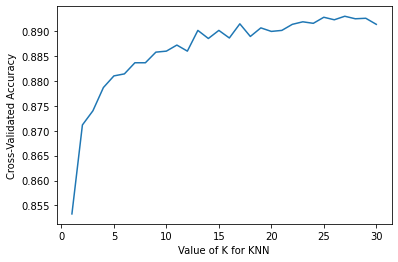

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

using GridSearchCV to get the best parameter for K.

In [ ]:
from sklearn.model_selection import GridSearchCV
# define the parameter values that should be searched
k_range = list(range(1, 31))

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

# instantiate the grid
grid = GridSearchCV(knn_clf, param_grid, cv=10, scoring='accuracy', return_train_score=False)
# fit the grid with data
grid.fit(X_train, y_train)
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
0.8929467458296598
{'n_neighbors': 27}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='uniform')


so 27 is the best parameter for k in knn.

**SVM-kernel**

In [ ]:
from sklearn.svm import SVC
kernel_svm_clf = SVC(kernel = 'rbf', random_state = 0)
kernel_svm_clf.fit(X_train, y_train)

print('Accuracy on training set:',kernel_svm_clf.score(X_train,y_train))
print('Accuracy on test set:',kernel_svm_clf.score(X_test,y_test))

Accuracy on training set: 0.8918288726682887
Accuracy on test set: 0.8807785888077859


In [ ]:
import sklearn.metrics as metrics   
                                     
y_pred = kernel_svm_clf.predict(X_test)
print(metrics. accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

0.8807785888077859
[[1983   72]
 [ 222  189]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2055
           1       0.72      0.46      0.56       411

    accuracy                           0.88      2466
   macro avg       0.81      0.71      0.75      2466
weighted avg       0.87      0.88      0.87      2466



**VotingClassifier**

In [ ]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
 estimators=[('lr', pipe), ('knn', knn_clf), ('XGB', xgb_clf)],
 voting='soft')
voting_clf.fit(X_train, y_train)

voting_clf.score(X_train, y_train)
voting_clf.score(X_test, y_test)

0.8811841038118411

**Comparing different classifiers using ROC-curve.**

Random (chance) Prediction: AUROC = 0.500
XGBClassifier: AUROC = 0.930
LogisticRegression: AUROC = 0.878


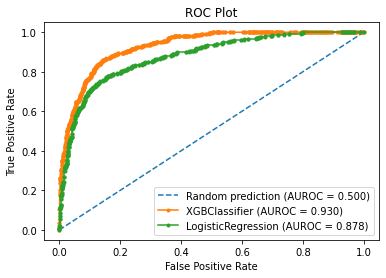

In [ ]:
# Prediction probabilities 

r_probs = [0 for _ in range(len(y_test))]
xgb_probs = xgb_clf.predict_proba(X_test)
leg_probs = pipe.predict_proba(X_test)
# Probabilities for the positive outcome is kept.


xgb_probs = xgb_probs[:, 1]
pipe_probs = leg_probs[:, 1]
# Computing AUROC and ROC curve values

from sklearn.metrics import roc_curve, roc_auc_score
# Calculate AUROC
# ROC is the receiver operating characteristic AUROC is the area under the ROC curve


r_auc = roc_auc_score(y_test, r_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
leg_auc = roc_auc_score(y_test, pipe_probs)
# Print AUROC scores

print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('XGBClassifier: AUROC = %.3f' % (xgb_auc))
print('LogisticRegression: AUROC = %.3f' % (leg_auc))

# Calculate ROC curve

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
xg_fpr, xg_tpr, _ = roc_curve(y_test, xgb_probs)
lg_fpr, lg_tpr, _ = roc_curve(y_test, pipe_probs)
# Plot the ROC curve

import matplotlib.pyplot as plt

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(xg_fpr, xg_tpr, marker='.', label='XGBClassifier (AUROC = %0.3f)' % xgb_auc)
plt.plot(lg_fpr, lg_tpr, marker='.', label='LogisticRegression (AUROC = %0.3f)' % leg_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

Random (chance) Prediction: AUROC = 0.500
XGBClassifier: AUROC = 0.930
LogisticRegression: AUROC = 0.878
KNeighbors: AUROC = 0.878


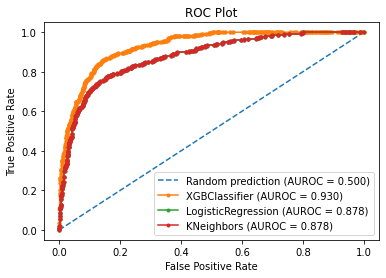

In [ ]:
# Prediction probabilities 

r_probs = [0 for _ in range(len(y_test))]
xgb_probs = xgb_clf.predict_proba(X_test)
leg_probs = pipe.predict_proba(X_test)
knn_probs = knn_clf.predict_proba(X_test)
# Probabilities for the positive outcome is kept.


xgb_probs = xgb_probs[:, 1]
pipe_probs = leg_probs[:, 1]
knn_probs = leg_probs[:, 1]
# Computing AUROC and ROC curve values

from sklearn.metrics import roc_curve, roc_auc_score
# Calculate AUROC
# ROC is the receiver operating characteristic AUROC is the area under the ROC curve


r_auc = roc_auc_score(y_test, r_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
leg_auc = roc_auc_score(y_test, pipe_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
# Print AUROC scores

print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('XGBClassifier: AUROC = %.3f' % (xgb_auc))
print('LogisticRegression: AUROC = %.3f' % (leg_auc))
print('KNeighbors: AUROC = %.3f' % (knn_auc))
# Calculate ROC curve

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
xg_fpr, xg_tpr, _ = roc_curve(y_test, xgb_probs)
lg_fpr, lg_tpr, _ = roc_curve(y_test, pipe_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test,knn_probs)
# Plot the ROC curve

import matplotlib.pyplot as plt

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(xg_fpr, xg_tpr, marker='.', label='XGBClassifier (AUROC = %0.3f)' % xgb_auc)
plt.plot(lg_fpr, lg_tpr, marker='.', label='LogisticRegression (AUROC = %0.3f)' % leg_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNeighbors (AUROC = %0.3f)' % knn_auc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

Random (chance) Prediction: AUROC = 0.500
VotingClassifier: AUROC = 0.916


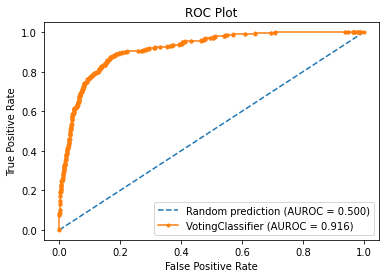

In [ ]:
# Prediction probabilities 

r_probs = [0 for _ in range(len(y_test))]
vot_probs = voting_clf.predict_proba(X_test)

# Probabilities for the positive outcome is kept.


vot_probs = vot_probs[:, 1]

# Computing AUROC and ROC curve values

from sklearn.metrics import roc_curve, roc_auc_score
# Calculate AUROC
# ROC is the receiver operating characteristic AUROC is the area under the ROC curve


r_auc = roc_auc_score(y_test, r_probs)
vot_auc = roc_auc_score(y_test, vot_probs)

# Print AUROC scores

print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('VotingClassifier: AUROC = %.3f' % (vot_auc))


# Calculate ROC curve

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
vot_fpr, vot_tpr, _ = roc_curve(y_test, vot_probs)

# Plot the ROC curve

import matplotlib.pyplot as plt

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(vot_fpr, vot_tpr, marker='.', label='VotingClassifier (AUROC = %0.3f)' % vot_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()